# Diagramme zur Aufgabe Freifallturm I

Dieses Notebook berechnet und zeichnet die Diagramme, die in der Teilaufgabe 5 der Aufgabe „Freifallturm I“ geforderten Diagramme. Aufgabenstellung und Musterlösung sind zu finden unter:

https://www-user.tu-chemnitz.de/~herbs/aufgabensammlung/freifallturm-i.html

In der Aufgabenstellung sind lediglich Skizzen der Diagramme gefordert. Für eine exakte Darstellung erfolgt hier hingegen die Berechnung der Kurven anhand der in der Aufgabenstellung gegebenen Größen.

## Allgemeines

Die Bewegung der Gondel setzt sich aus drei Abschnitten zusammen:

1. Abschussphase: gleichmäßig beschleunigte Bewegung mit Beschleunigung nach oben ($a>0$).
2. „Flug“-Phase: gleichmäßig beschleunigte Bewegung unter dem Einfluss der Fallbeschleunigung ($a=-g$).
3. Bremsphase: gleichmäßig beschleunigte Bewegung unter dem Einfluss der Bremsverzögerung ($a>0$).

Für jeden Bewegungsabschnitt werden die Bewegungsgesetze separat aufgestellt und gezeichnet. Hierfür muss jeweils die wirkende Beschleunigung und (in zweiter und dritter Phase) Anfangsgeschwindigkeit und -höhe bestimmt werden. Zudem müssen die Zeitpunkte bestimmt werden, zu denen die jeweiligen Bewegungsphasen enden (wobei die Dauer der Abschussphase in der Aufgabenstellung gegeben ist).

### Benennung der Größen im Skript

- Fixe Zeitpunkte entsprechend der Schreibweise $t_1$ usw.:
  - t_1: Ende der Abschussphase, Beginn der Flugphase
  - t_2: Maximale Höhe während der Flugphase
  - t_3: Ende der Flugphase, Beginn der Bremsphase
  - t_4: Ende der Bremsphase, Ende der Bewegung
- Höhe und Geschwindigkeit zu diesen Zeitpunkten (fixe Momentanwerte) werden als h_1 usw. bezeichnet
- Zeitvariable für die drei Bewegungsphasen: t_var1, t_var2, t_var3 (NumPy-Arrays)
- Höhe, Geschwindigkeit und Beschleunigung in den drei Phasen werden als h_Abschnitt1 usw bezeichnet
  - Höhe und Geschwindigkeit sind NumPy-Arrays
  - Beschleunigung ist eine einzelne Zahl. Die Erstellung eines Array erfolgt erst im Plot-Befehl

Zur Berechnung werden zunächst die erforderlichen Module geladen und die gegebenen Größen zugewiesen:

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Gegebene Größen und Konstanten
g = 9.82 #Fallbeschleunigung [m/s^2]
t_1 = 0.92 # Beschleunigungszeit, Ende des ersten Bewegungsabschnitts [s]
h_steig = 35 # Steighöhe NACH Ende des Abschusses [m]
h_3 = 17 # Höhe bei Einsetzen der Bremsen [m]

## Erste Bewegungsphase: Abschussphase

Die erste Bewegungsphase erstreckt sich von $t=0$ bis $t_1$. Die Zeit $t_1$ ist in der Aufgabenstellung gegeben und wurde oben bereits erfasst. Als Zeitvariable wird NumPy-Array erstellt, das dieses Zeitintervall abdeckt:

In [2]:
t_var1 = np.linspace(0, t_1, 50)

### Bewegungsgesetze für die Abschussphase

Die **Beschleunigung** wurde in Teilaufgabe 2 bestimmt. Mit der hier eingeführten Nomenklatur gilt:

$$a_\mathrm{Abschnitt1} = \frac{\sqrt{2gh_\mathrm{steig}}}{t_1} \, .$$

Für die **Geschwindigkeit** gilt bei konstanter Beschleunigung ohne Anfangsgeschwindigkeit:

$$v(t) = a_\mathrm{Abschnitt1} t \, .$$

Für die **Höhe** gilt ohne Anfangshöhe und -geschwindigkeit:

$$h(t) = \frac{1}{2} a_\mathrm{Abschnitt1} t^2 \, .$$

Diese Formeln werden im Skript erfasst:

In [3]:
a_Abschnitt1 = math.sqrt(2 * g * h_steig) / t_1

v_Abschnitt1 = a_Abschnitt1 * t_var1

h_Abschnitt1 = 0.5 * a_Abschnitt1 * t_var1**2

### Zustand am Ende der ersten Bewegungsphase

Zum Zeitpunkt $t_1$ gilt für die Geschwindigkeit

$$v_1 = v(t_1) = \sqrt{2gh_\mathrm{steig}}$$

und für die Höhe

$$h_1 = h(t_1) = \sqrt{\frac{gh_\mathrm{Steig}}{2}}t_1 \, .$$

In [4]:
v_1 = math.sqrt(2 * g * h_steig)

h_1 = math.sqrt( 0.5 * g * h_steig) * t_1

## Zweite Bewegungsphase: Flugphase

Die zweite Bewegungsphase erfolgt unter dem Einfluss der Fallbeschleunigung:

In [5]:
a_Abschnitt2 = -g

Das Ende dieses Bewegungsabschnitts ist durch den (noch unbekannten) Zeitpunkt $t_3$ gegeben. Lediglich die Höhe zu diesem Zeitpunkt ist bekannt und wurde oben bereits als $h_3$ erfasst. Aus dem Höhe-Zeit-Gesetz für diesen Bewegungsabschnitt folgt

$$h_3 = \frac{1}{2}a_\mathrm{Abschnitt1}(t_3 - t_1)^2 + v_1 (t_3 - t_1) + h_1 \, .$$

Diese quadratische Gleichung für $(t_3 - t_1)$ führt (unter Vernachlässigung der zweiten, hier nicht relevanten Lösung) schließlich zu

$$t_3 = -\frac{v_1}{a_\mathrm{Abschnitt2}} + \sqrt{\frac{v_1^2}{a_\mathrm{Abschnitt2}^2} - \frac{2(h_1 - h_3)}{a_\mathrm{Abschnitt2}}} + t_1 \, .$$

Diese Formel und die darauf aufbauende Zeitvariable für den zweiten Bewegungsabschnitt werden erfasst:

In [6]:
t_3 = -v_1 / a_Abschnitt2 + math.sqrt(v_1**2 / a_Abschnitt2**2 - 2*(h_1 - h_3) / a_Abschnitt2) + t_1

t_var2 = np.linspace(t_1, t_3, 50)

### Bewegungsgesetze für die Flugphase

Auch hierbei handelt es sich um eine gleichmäßig beschleunigte Bewegung. Für die Geschwindigkeit gilt

$$v(t) = a_\mathrm{Abschnitt2} (t - t_1) + v_1 \, .$$

Für die Höhe gilt

$$h(t) = \frac{1}{2}a_\mathrm{Abschnitt2} (t-t_1)^2 + v_1(t-t_1) + h_1 \, .$$

In [7]:
v_Abschnitt2 = a_Abschnitt2 * (t_var2 - t_1) + v_1

h_Abschnitt2 = 0.5 * a_Abschnitt2 * (t_var2 - t_1)**2 + v_1 * (t_var2 - t_1) + h_1

### Erreichen des Scheitelpunkts

Um im Diagramm den Zeitpunkt $t_2$ (Erreichen des Scheitelpunkts) eintragen zu können, muss dieser hier berechnet werden. Im Scheitelpunkt ist die Geschwindigkeit Null:

$$v(t_2) = a_\mathrm{Abschnitt2}(t_2 - t_1) + v_1 = 0 \, .$$

Umgestellt nach $t_2$ folgt

$$t_2 = t_1 - \frac{v_1}{a_\mathrm{Abschnitt 2}} \, .$$

Das negative Vorzeichen in der Formel ist korrekt. Da die Beschleunigung ebenfalls negativ ist, gilt $t_2 > t_1$.

In [8]:
t_2 = t_1 - v_1 / a_Abschnitt2

### Zustand am Ende der Flugphase

Die Höhe $h_3$ ist in der Aufgabenstellung gegeben. Für die Geschwindigkeit am Ende der Fugphase folgt:

$$v_3 = v_1 + a_\mathrm{Abschnitt2}(t_3 - t_1) \, .$$

In [9]:
v_3 = v_1 + a_Abschnitt2 * (t_3 - t_1)

## Dritte Bewegungsphase: Bremsphase

Zunächst muss die Beschleunigung bestimmt werden, da diese für die Ermittlung der Zeit $t_4$ benötigt wird. Die Hereitung der Beschleunigung ist in der Musterlösung zu finden. Mit der hier verwendeten Nomenklatur gilt

$$a_\mathrm{Abschnitt3} = g \frac{h_1 + h_\mathrm{steig} - h_3}{h_3} \, .$$

Der Zeitpunkt $t_4$ ist erreicht, wenn die Geschwindigkeit Null ist:

$$v(t_4) = a_\mathrm{Abschnitt3} (t_4 - t_3) = 0 \, .$$

Daraus ergibt sich

$$t_4 = t_3 - \frac{v_3}{a_\mathrm{Abschnitt3}} \, .$$

Aufbauend auf diesen Zeitpunkt kann dann die Zeitvariable für die Bremsphase definiert werden:

In [10]:
a_Abschnitt3 = g * (h_1 + h_steig - h_3) / h_3

t_4 = t_3 - v_3 / a_Abschnitt3

t_var3 = np.linspace(t_3, t_4, 50)

### Bewegungsgesetze für die Bremsphase

Auch hier liegt eine geichmäßig beschleunigte Bewegung vor. Für die Geschwindigkeit gilt

$$v(t) = a_\mathrm{Abschnitt3} (t - t_3) + v_3 \, .$$

Für die Höhe gilt

$$h(t) = \frac{1}{2} a_\mathrm{Abschnitt3} (t-t_3)^2 + v_3 (t-t_3) + h_3 \, .$$

In [11]:
v_Abschnitt3 = a_Abschnitt3 * (t_var3 - t_3) + v_3

h_Abschnitt3 = 0.5 * a_Abschnitt3 * (t_var3 - t_3)**2 + v_3 * (t_var3 - t_3) + h_3

## Erstellung der Diagramme

Die drei Zusammenhänge $h(t)$, $v(t)$ und $a(t)$ werden in separaten Diagrammen dargestellt. Die Vorgehensweise wird am ersten Diagramm erläutert.

### Höhe-Zeit-Diagramm

- Erstellung einer Figure mit zugehöriger Axes
- Beschriftung von Diagramm und Achsen
- Festlegung der Zeitachse auf das Zeitintervall von $t_0$ bis $t_4$
- Festlegung der Höhenachse (nur in diesem Diagramm manuell vorgenommen)
- Einschalten der Gitternetzlinien
- Plotten der drei Funktionen für die drei Bewegungsphasen
  - Manuelle Festlegung der Farbe, da sonst automatisch verschiedene Farben verwendet würden
- Eintragen der Zeitpunkte $t_1$, $t_2$ und $t_3$ als vertikale Strichlinien
- Einblenden der Legende, damit die Label der vertikalen Linien angezeigt werden.

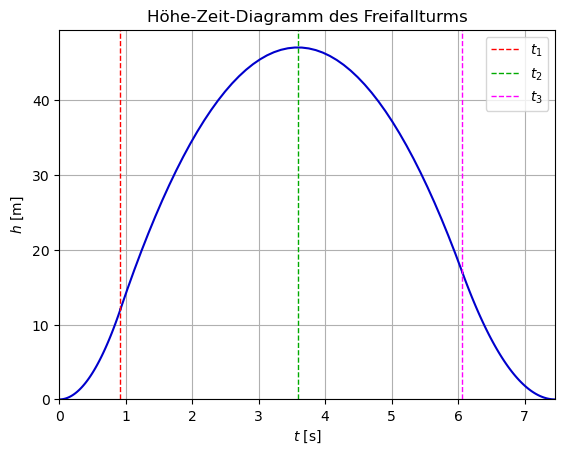

In [12]:
fig_hoehe = plt.figure()
ax_hoehe = fig_hoehe.add_subplot(1,1,1)

ax_hoehe.set_title('Höhe-Zeit-Diagramm des Freifallturms')
ax_hoehe.set_xlabel(r'$t$ [s]')
ax_hoehe.set_ylabel(r'$h$ [m]')
ax_hoehe.set_xlim(0, t_4)
ax_hoehe.set_ylim(0, 1.05 * (h_1 + h_steig))
ax_hoehe.grid()

ax_hoehe.plot(t_var1, h_Abschnitt1, color='#0000cc')
ax_hoehe.plot(t_var2, h_Abschnitt2, color='#0000cc')
ax_hoehe.plot(t_var3, h_Abschnitt3, color='#0000cc')

ax_hoehe.axvline(x = t_1, color ='#ff0000', linestyle='--',
                          linewidth=1, label =r'$t_1$')
ax_hoehe.axvline(x = t_2, color ='#00aa00', linestyle='--',
                          linewidth=1, label =r'$t_2$')
ax_hoehe.axvline(x = t_3, color ='#ff00ff', linestyle='--',
                          linewidth=1, label =r'$t_3$')
ax_hoehe.legend()

#plt.savefig('freifallturm_hoehe-zeit.svg')

### Geschwindigkeit-Zeit-Diagramm

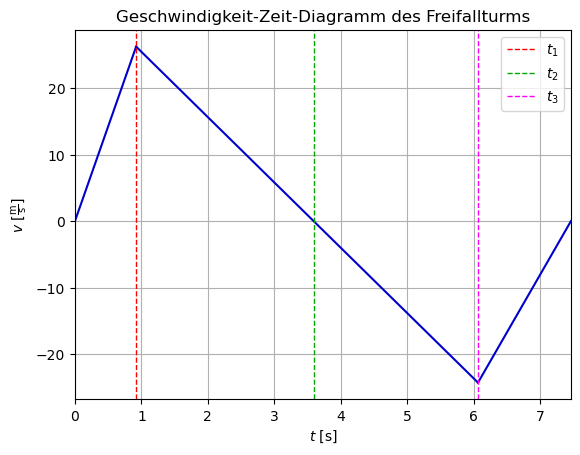

In [13]:
fig_geschwindigkeit = plt.figure()
ax_geschwindigkeit = fig_geschwindigkeit.add_subplot(1,1,1)

ax_geschwindigkeit.set_title('Geschwindigkeit-Zeit-Diagramm des Freifallturms')
ax_geschwindigkeit.set_xlabel(r'$t$ [s]')
ax_geschwindigkeit.set_ylabel(r'$v$ $\left[\frac{\mathrm{m}}{\mathrm{s}}\right]$')
ax_geschwindigkeit.set_xlim(0, t_4)
ax_geschwindigkeit.grid()

ax_geschwindigkeit.plot(t_var1, v_Abschnitt1, color='#0000cc')
ax_geschwindigkeit.plot(t_var2, v_Abschnitt2, color='#0000cc')
ax_geschwindigkeit.plot(t_var3, v_Abschnitt3, color='#0000cc')

ax_geschwindigkeit.axvline(x = t_1, color ='#ff0000', linestyle='--',
                          linewidth=1, label =r'$t_1$')
ax_geschwindigkeit.axvline(x = t_2, color ='#00aa00', linestyle='--',
                          linewidth=1, label =r'$t_2$')
ax_geschwindigkeit.axvline(x = t_3, color ='#ff00ff', linestyle='--',
                          linewidth=1, label =r'$t_3$')
ax_geschwindigkeit.legend()

#plt.savefig('freifallturm_geschwindigkeit-zeit.svg')

### Beschleunigung-Zeit-Diagramm

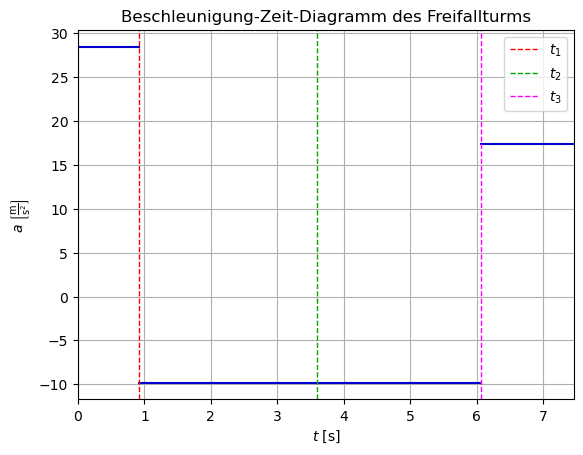

In [14]:
fig_beschleunigung = plt.figure()
ax_beschleunigung = fig_beschleunigung.add_subplot(1,1,1)

ax_beschleunigung.set_title('Beschleunigung-Zeit-Diagramm des Freifallturms')
ax_beschleunigung.set_xlabel(r'$t$ [s]')
ax_beschleunigung.set_ylabel(r'$a$ $\left[\frac{\mathrm{m}}{\mathrm{s^2}}\right]$')
ax_beschleunigung.set_xlim(0, t_4)
ax_beschleunigung.grid()

ax_beschleunigung.plot(t_var1, np.ones(len(t_var1))*a_Abschnitt1, color='#0000cc')
ax_beschleunigung.plot(t_var2, np.ones(len(t_var2))*a_Abschnitt2, color='#0000cc')
ax_beschleunigung.plot(t_var3, np.ones(len(t_var3))*a_Abschnitt3, color='#0000cc')

ax_beschleunigung.axvline(x = t_1, color ='#ff0000', linestyle='--',
                          linewidth=1, label =r'$t_1$')
ax_beschleunigung.axvline(x = t_2, color ='#00aa00', linestyle='--',
                          linewidth=1, label =r'$t_2$')
ax_beschleunigung.axvline(x = t_3, color ='#ff00ff', linestyle='--',
                          linewidth=1, label =r'$t_3$')
ax_beschleunigung.legend()

#plt.savefig('freifallturm_beschleunigung-zeit.svg')